Point class: 1
Target class: 0


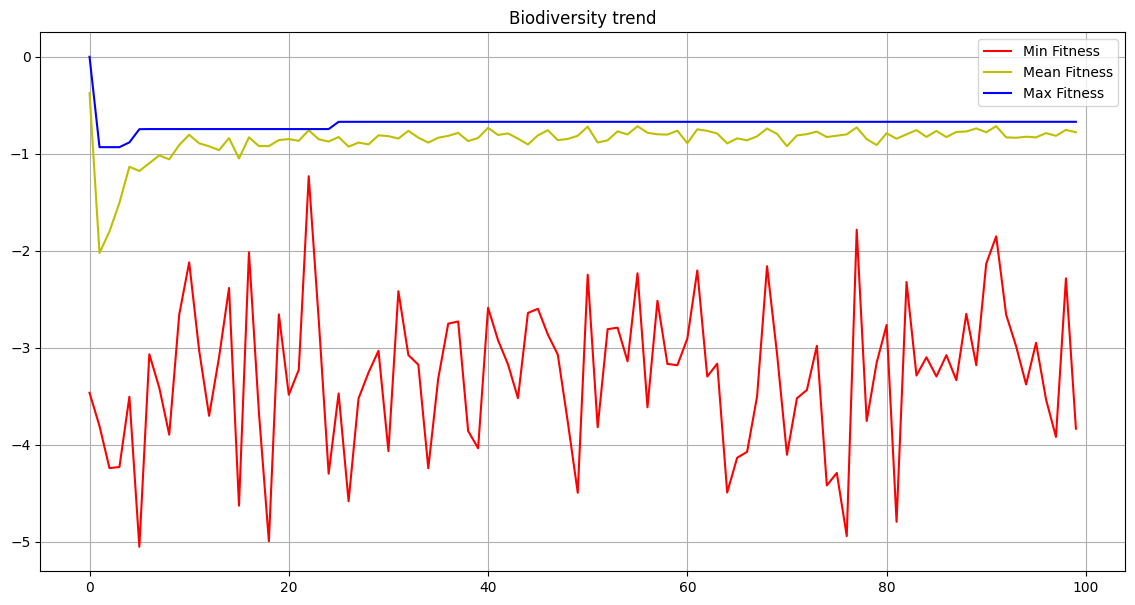

In [4]:
import json
import numpy as np
import matplotlib.pyplot as plt

fp = open("../../results/toy_neighborhood.json", "r")
data = json.load(fp)
fp.close()

p1 = data[0]
c = p1["class"]
target = p1["target"]

print(f"Point class: {c}")
print(f"Target class: {target}")

diversity = p1["stats"]["diversity"]
min = np.array(p1["stats"]["min"])
mean = np.array(p1["stats"]["mean"])
max = np.array(p1["stats"]["max"])

plt.figure(figsize=(14, 7))
plt.title("Biodiversity trend")
# plt.plot([i for i in range(len(diversity))], diversity, c="g", label="Bio-Diversity")
plt.plot([i for i in range(len(min))], min, c="r", label="Min Fitness")
plt.plot([i for i in range(len(mean))], mean, c="y", label="Mean Fitness")
plt.plot([i for i in range(len(max))], max, c="b", label="Max Fitness")

plt.legend()
plt.grid()
plt.show()